# Requisitos Obligatorios

- Modelos Scikit-learn: Usa al menos estos modelos (sí, en serio). Regresión Lineal, Regresión Logística, Árboles de Decisión, Random Forest, Gradient Boosting, SVM, k-NN, Naive Bayes, k-Means, PCA. Prueba múltiples modelos por problema y documenta cuál fue el mejor.
- Entrena, prueba y valida cada modelo (imagina que el jefe te está mirando).
- Genera visualizaciones que se vean bien y entreguen insights 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Librerías de Machine Learning
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,  # Asegúrate de que esta línea esté presente
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [11]:
df_bank = pd.read_csv('datos/bank.csv',sep=';')
df_bankfull = pd.read_csv('datos/bank-full.csv', sep=';')
df_onlineRetail= pd.read_excel('datos/onlineretail.xlsx', sheet_name='Online Retail')

In [12]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df_bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [14]:
df_bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [15]:
df_bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [16]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
df_bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Figure size 2000x1000 with 0 Axes>

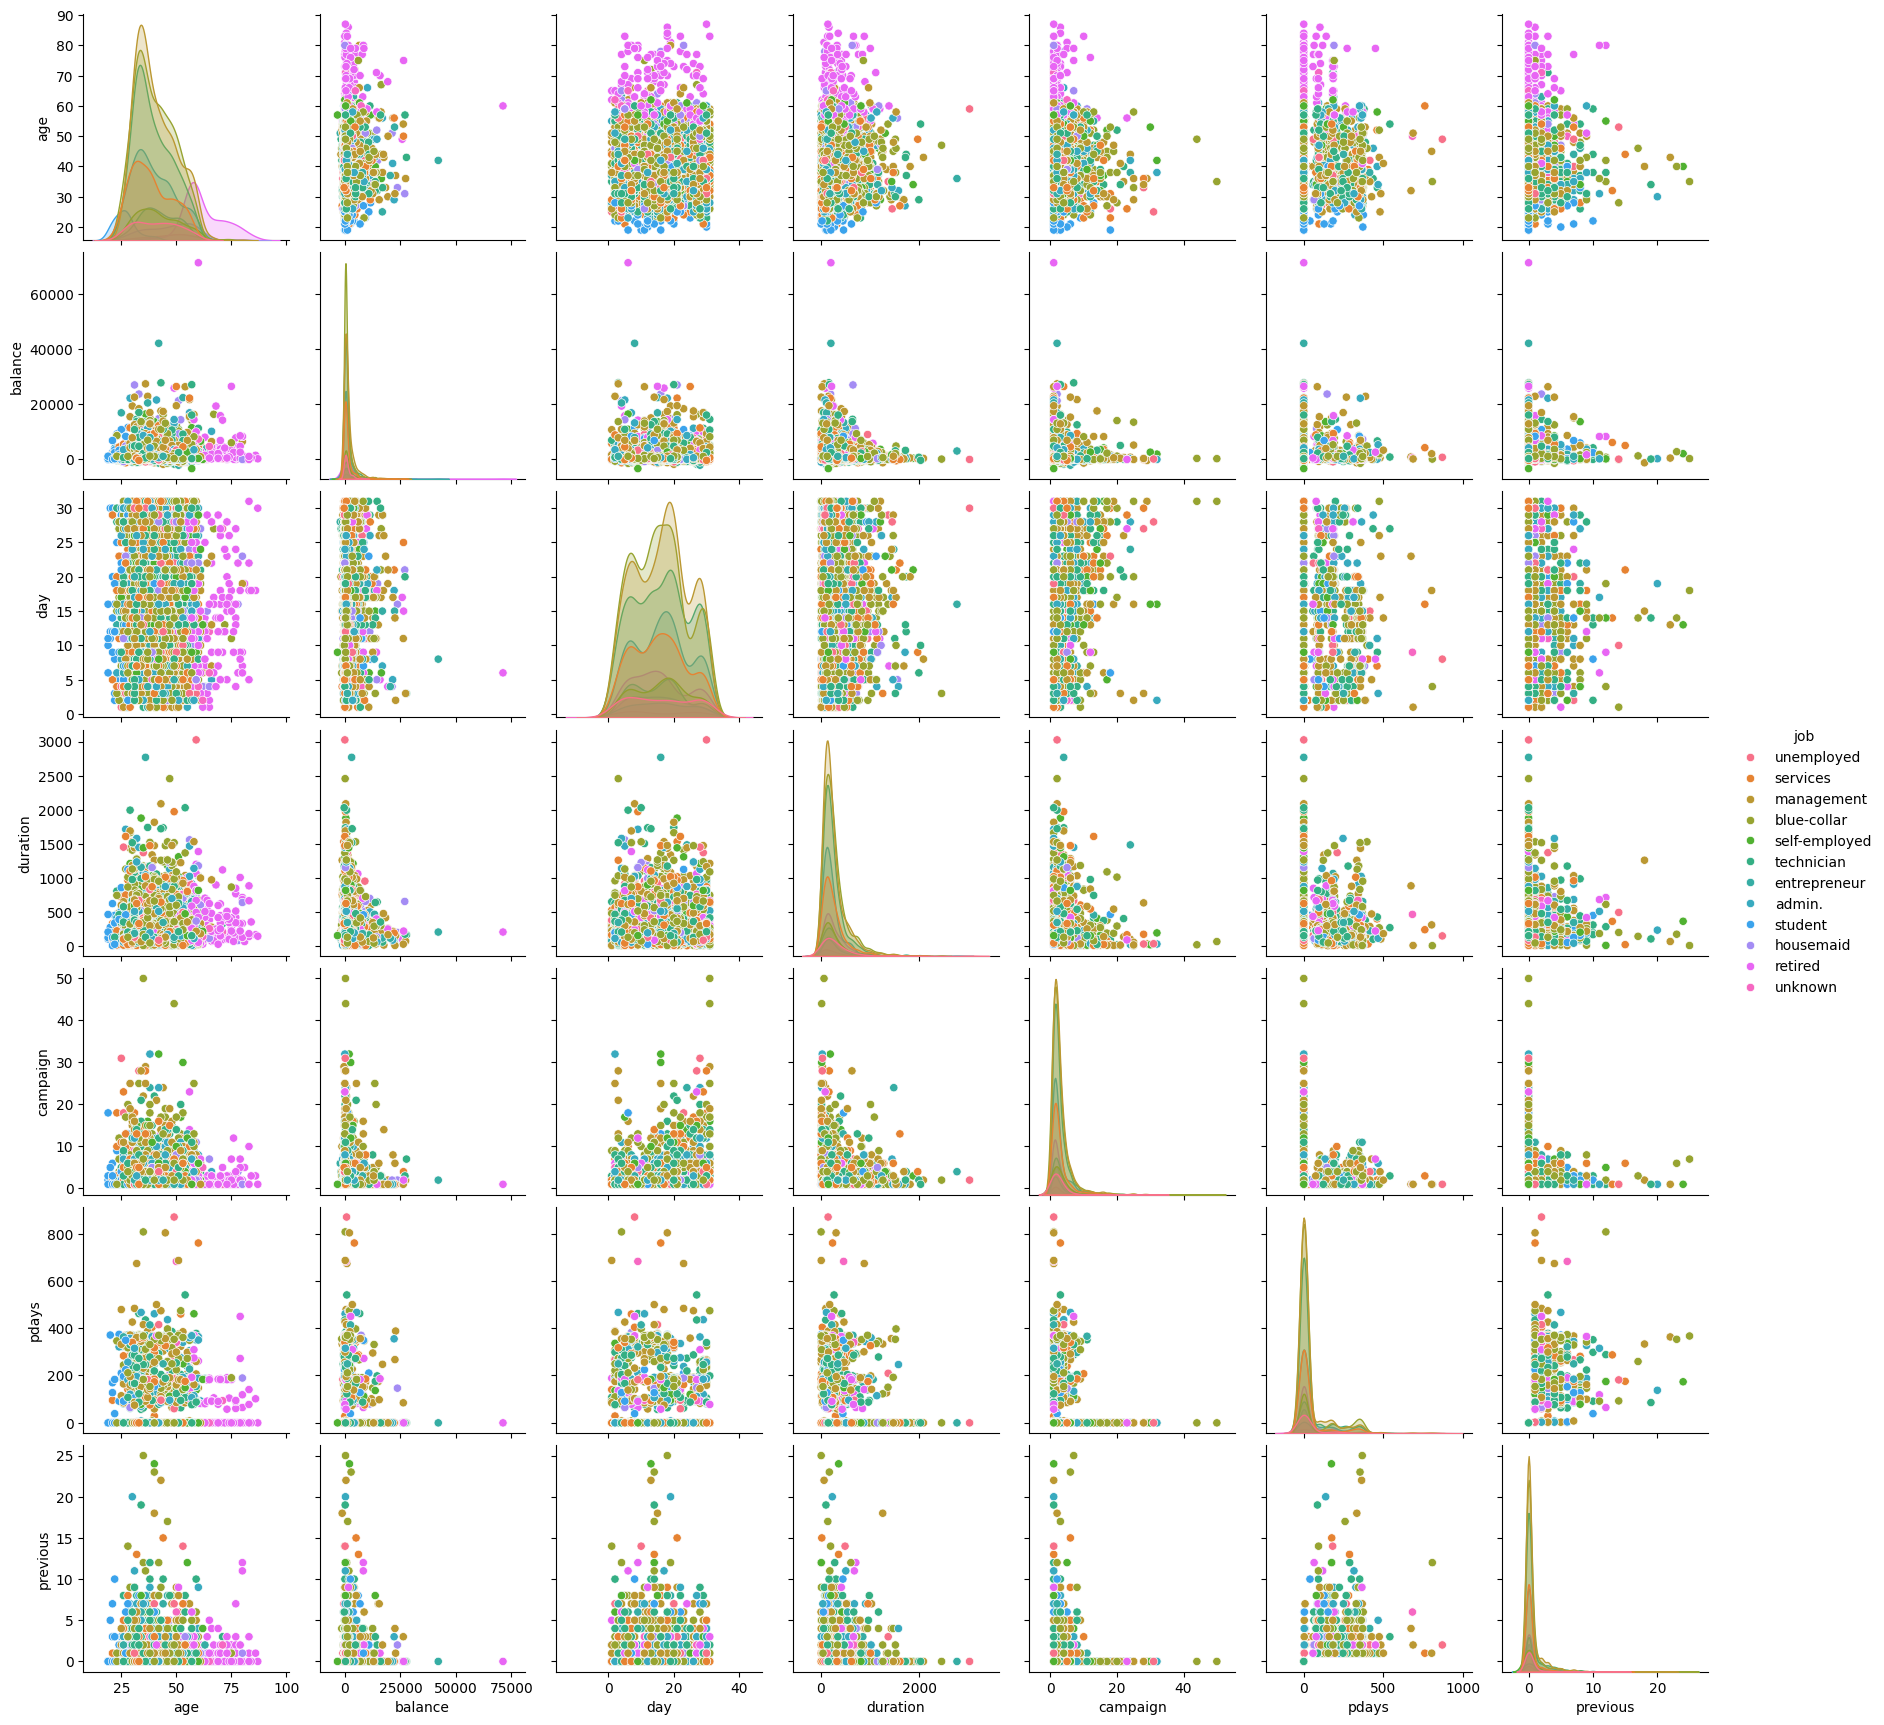

In [18]:
plt.figure(figsize=(20,10))

sns.pairplot(
    data=df_bank,
    hue='job'
)
plt.show()

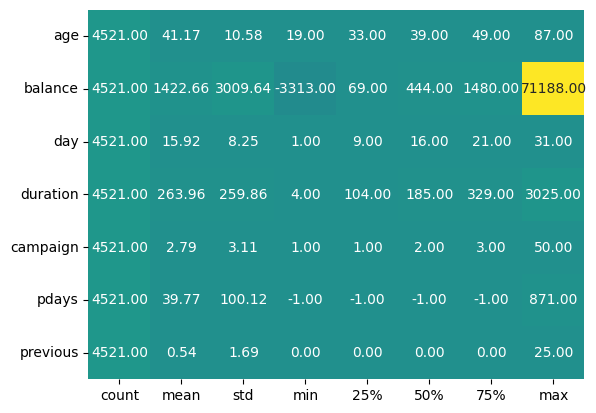

In [19]:
g=sns.heatmap(
    df_bank.describe(include=[np.number]).T,
    annot=True,
    fmt="0.2f",
    cmap='viridis',
    cbar=False,
    center=0,
    cbar_kws={'orientation':'horizontal'}
)
plt.show()

In [20]:
IRQ=df_bank['age'].quantile(0.75)-df_bank['age'].quantile(0.25)
limite_inferior=df_bank['age'].quantile(0.25)-1.5*(IRQ)

# Limite superior Q3+1.5*IQR
limite_superior=df_bank['age'].quantile(0.75)+1.5*(IRQ)

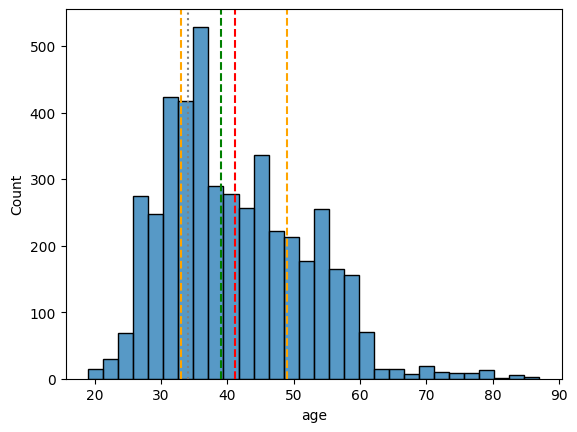

In [21]:
sns.histplot(data=df_bank,x='age',bins=30)
plt.axvline(df_bank['age'].mean(), color='red', linestyle='--')
plt.axvline(df_bank['age'].median(), color='green', linestyle='--')
plt.axvline(df_bank['age'].mode()[0], color='grey', linestyle=':')
plt.axvline(df_bank['age'].quantile(0.25), color='orange', linestyle='--')
plt.axvline(df_bank['age'].quantile(0.75), color='orange', linestyle='--')



plt.show()

1. Predicción de Deserción de Clientes (Clasificación Binaria)

Este caso busca predecir si un cliente abandonará (o no) la plataforma, utilizando las características disponibles.

Regresión Logística: Modelo simple y eficaz para problemas de clasificación binaria.  
Arboles de Decisión o Random Forest: Para manejar interacciones complejas entre variables y proporcionar interpretabilidad.  
Gradient Boosting (XGBoost, LightGBM): Para obtener predicciones más precisas en problemas con relaciones no lineales.

In [22]:
df_bank['job'] = df_bank['job'].apply(lambda x: 0 if x in ['retired', 'unknown','student'] else 1)

In [36]:
df_bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [24]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,1,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,1,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
# Algoritmo de regresion logistica.
# Necesitamos segun la convertir las columnas a valores binarios, lo cual algunos ya lo son.
df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
df_bank['housing']=df_bank['housing'].replace({'yes': 1, 'no':0})
df_bank['y']=df_bank['y'].replace({'yes': 1, 'no':0})
# Esto lo hacemos para mejor implementacion del modelo.

/tmp/ipykernel_6631/1065673040.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_6631/1065673040.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_6631/1065673040.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [26]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   int64 
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(12), object(5)
memory usage: 600.6+ KB


In [27]:
def preparar_datos(df):
    """Preparar datos para modelado"""
    # Separar características y variable objetivo
    X = df.drop('y', axis=1)
    y = df['y']

    # Identificar columnas
    columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
    columnas_categoricas = X.select_dtypes(include=['object']).columns

    # Crear preprocessador
    preprocessador = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columnas_numericas),
            ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
        ])

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessador

In [28]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, preprocessador):
    """Entrenar y evaluar un modelo de clasificación"""
    # Crear pipeline
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('clasificador', modelo)
    ])

    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)

    # Métricas de evaluación
    print(f"\nMetricas para {type(modelo).__name__}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {type(modelo).__name__}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    # Validación cruzada con estratificación
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
    print("Validación Cruzada - Scores:", cv_scores)
    print("Validación Cruzada - Media:", cv_scores.mean())

    return pipeline

In [29]:
def graficar_curva_roc(modelos, X_test, y_test):
    """Graficar Curva ROC para múltiples modelos"""
    plt.figure(figsize=(10, 6))

    for nombre, modelo in modelos.items():
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [30]:
def main(df):
    # 2. Preparar datos
    X_train, X_test, y_train, y_test, preprocessador = preparar_datos(df)

    # 3. Definir y evaluar modelos
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    resultados_modelos = {}
    for nombre, modelo in modelos.items():
        resultados_modelos[nombre] = evaluar_modelo(modelo, X_train, X_test, y_train, y_test, preprocessador)

    # 4. Curva ROC
    graficar_curva_roc(resultados_modelos, X_test, y_test)